# Приоритизация гипотез и анализ результатов A/B-теста 

# Описание проекта
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки. Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

# Содержание

# Часть 1. Приоритизация гипотез.

[Описание данных и их предобработка.](#step1_0)

# Задачи:

1. [Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.](#step1_1)
2. [Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.](#step1_2)
3. [Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.](#step1_3)

# Часть 2. Анализ А/В-теста.

[Описание данных и их предобработка.](#step2_0)

# Задачи:

1. [Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.](#step2_1)
2. [Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения](#step2_2)
3. [Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.](#step2_3)
4. [Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.](#step2_4)
5. [Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.](#step2_5)
6. [Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.](#step2_6)
7. [Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.](#step2_7)
8. [Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.](#step2_8)
9. [Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения анамальных заказов.](#step2_9)
10. [Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.](#step2_10)
11. [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.](#step2_11)
12. [Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.](#step2_12)
13. [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.](#step2_13)
14. [Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.](#step2_14)

# Часть 1. Приоритизация гипотез.

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy import stats as st
import math
import warnings
warnings.filterwarnings('ignore')

# Описание данных для первой части<a class="anchor" id="step1_0"></a>

Файл hypothesis.csv содержит следующие столбцы:
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [2]:
# таблица выглядит в порядке, можно приступать к заданию
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.set_option('display.max_colwidth', -1)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


# 1.1 Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.<a class="anchor" id="step1_1"></a>

Рассчет метрики:
$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [3]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values(by='ICE',ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


При применение метода приоритизиции гипотез **ICE** самыми приоритетными оказались гипотезы под номерм **8**, **0** и **7**.

# 1.2 Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.<a class="anchor" id="step1_2"></a>

Рассчет метрики:
$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [4]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values(by='RICE',ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


При применение метода приоритизиции гипотез **RICE** самыми приоритетными оказались гипотезы под номерм **7**, **2** и **0**.

# Изменения при применении RICE вместо ICE. <a class="anchor" id="step1_3"></a>

Самые большие различия произошли с гипотезой **№8**, которая была на 1 месте , а стала на 5, и с гипотезой **№7**, которая при применении метода RICE поднялась на 1 место по приоритету. Это произошло по тому, что формула для подсчета ICE не учитывает параметр **Reach**(охват пользователей). А вот формула для подсчета RICE учитывает этот параметр, добавляя его в числитель и влияя на общий ответ(чем больше Reach, как в случае с гипотезой нормер 7, тем выше скор по RICE, и чем о ниже, как в гипотезе №8, тем ниже скор RICE). Но не стоит забывать и об остольных параметрах, как в случае с гипотезой №3, которая при применении методов ICE и RICE оказалась на 8 и 6 месте соответственно. при Reach = 8(т.е 80% охват аудитории, что довольно много). Все из-за того что слишком маленькая оценка у параметров Impact и Confidence, так же довольно большая оценка параметра Efforts, которы стоит в знаменателе и влияет на итоговый скор.

# Часть 2. Анализ А/В-теста.

# Описаные данных для второй части<a class="anchor" id="step2_0"></a>
Файл *orders.csv* содержит столбцы: 
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл *visitors.csv* содержит столбцы:
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [5]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')
print(orders.info(),'\n\n')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [6]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
# все что необходимо сделать, это привести даты к правильному формату, ну и названия cтолбцов в orders к нижнему регистру
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])
orders.columns = map(str.lower, orders.columns)

In [9]:
# проверим датасеты на дубликаты
orders.duplicated().sum()

0

In [10]:
# в обоих таблицах дубликаты отсутствуют
visitors.duplicated().sum()

0

In [11]:
# тут выхордит что есть 58 пользователей, которые присутствуют в обеих группах
# но проблема в том, что в таблице visitors они сагрегированны, и от туда мы уже не сможем их удалить, придется оставить их
users_A = orders.query('group == "A"')['visitorid'].unique()
users_B = orders.query('group == "B"')['visitorid'].unique()
len(set(users_A).intersection(set(users_B)))

58

In [12]:
# Прежде чем построить графики, нужно собрать кумулятивные данные
# Создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

In [13]:
# получаем агрегированные кумулятивные по дням данные
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

In [14]:
# получаем агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                    .agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),axis=1)\
                                    .sort_values(by=['date', 'group'])

In [15]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date','group','orders','buyers','revenue','visitors']
# сразу посчитаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

In [16]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856


# 1. Строим график кумулятивной выручки по группам.<a class="anchor" id="step2_1"></a>

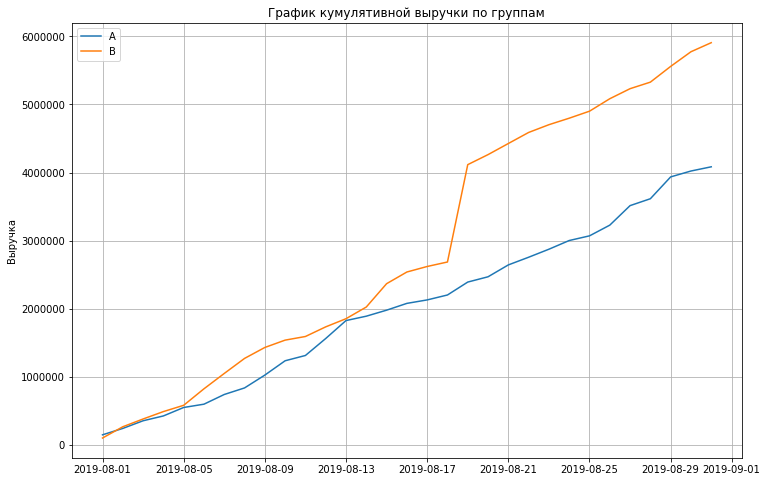

In [17]:
plt.figure(figsize=(12,8))
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по группам')
plt.grid()
plt.legend();

В целом выручки увеличвается равноверно, однако у 'B' есть резкий скачок почти в середине теста, скорее всего это из-за выброса.

# 2. Строим график кумулятивного среднего чека по группам<a class="anchor" id="step2_2"></a>

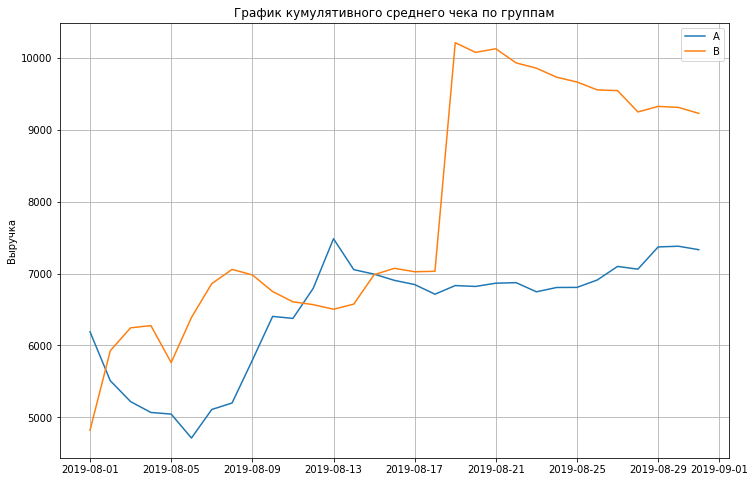

In [18]:
plt.figure(figsize=(12,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.ylabel('Выручка')
plt.title('График кумулятивного среднего чека по группам')
plt.grid()
plt.legend();

Тут та же самая ситуация, сильный выброс в группе 'B' в то же самое время, а потом падение среднего чека.

# 3. Строим график относительного изменения кумулятивного среднего чека группы В к группе А<a class="anchor" id="step2_3"></a>

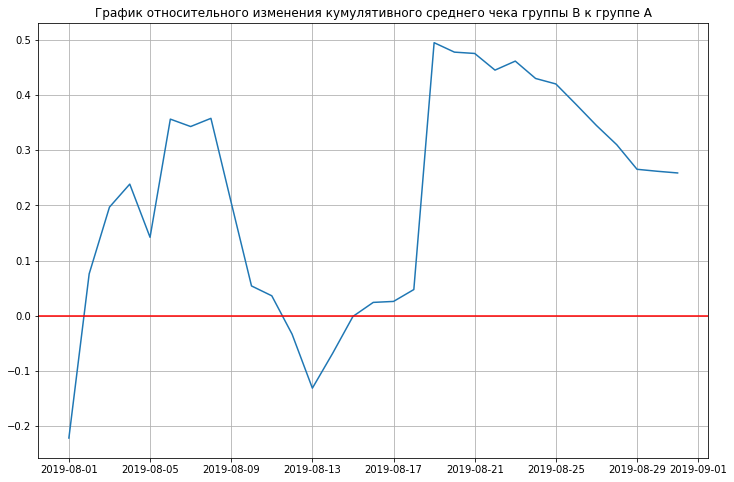

In [19]:
plt.figure(figsize=(12,8))
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='red')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.grid()

График очень сильно скачет скарзу в нескольких местах, что бы пытаться делать какие-либо выводы, необходимо обработать выбросы.

# 4. Строим график  кумулятивной конверсии по группам<a class="anchor" id="step2_4"></a>

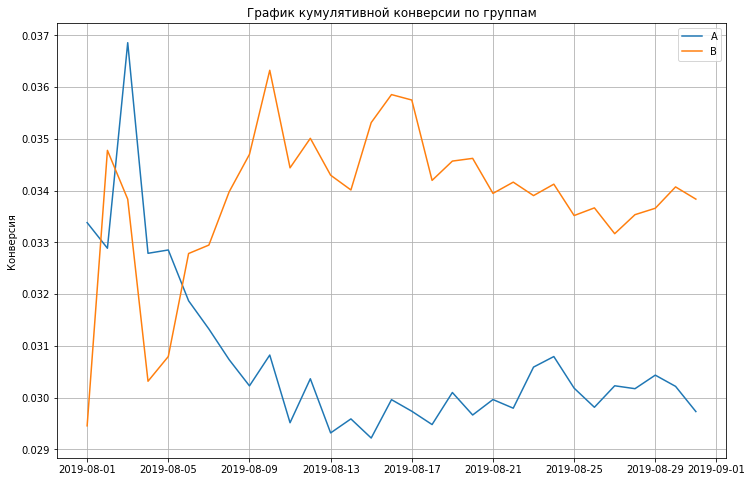

In [20]:
plt.figure(figsize=(12,8))
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам')
plt.ylabel('Конверсия')
plt.grid()
plt.legend();

В целом пока что конверсия группы 'B' выглядит лучше конверсии группы 'A'. Но не забываем, что данные не очищены.

# 5. Строим график относительного изменения кумулятивной конверсии группы В к группе А<a class="anchor" id="step2_5"></a>

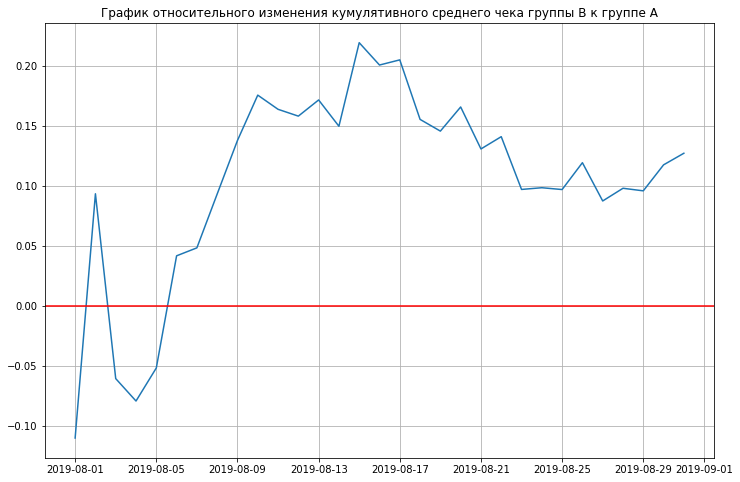

In [21]:
plt.figure(figsize=(12,8))
mergedCumulativeData = cumulativeDataA.merge(cumulativeDataB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeData['date'], (mergedCumulativeData['conversionB']/mergedCumulativeData['visitorsB'])/(mergedCumulativeData['conversionA']/mergedCumulativeData['visitorsA'])-1)
plt.axhline(y=0, color='red')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.grid()

Пока что корнверсия группы 'B' выглядить значительно лучше при текущем количестве дней и неочищенных данных.

# 6. Строим точечный график количества заказов по пользователям<a class="anchor" id="step2_6"></a>

In [22]:
# Построим таблицу, которая показывает количество заказов по пользователям
ordersByUsers = orders.groupby('visitorid', as_index=False).agg({'transactionid': pd.Series.nunique})\
.rename(columns={'transactionid':'orders'})

In [23]:
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorid,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


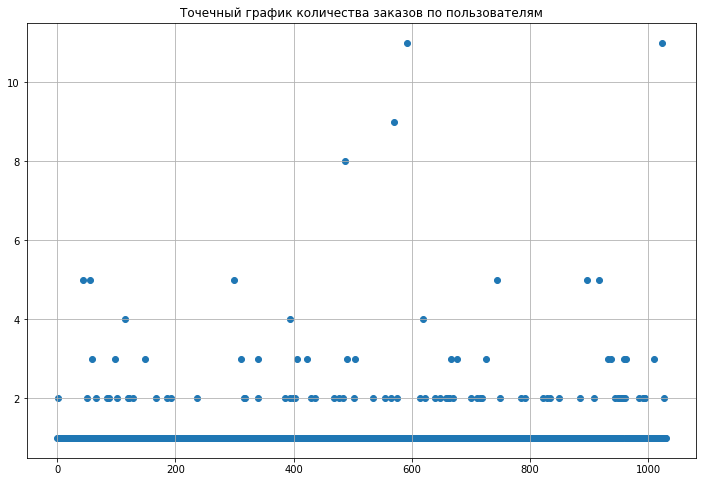

In [24]:
plt.figure(figsize=(12,8))
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.grid();

Можно сделать вывод, что основная масса пользователей совершают всего один или два заказа, остальные, кажется, похожи на выбросы.

# 7. Считаем 95-й и 99-й перцентили количества заказов на пользователя<a class="anchor" id="step2_7"></a>

In [25]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 2. 4.]


Выходит, что не более 1% пользователей делают больше 4 заказов. Значит всех, кто соврешил 4 и более заказов - будем считать аномалией.

# 8. Строим точечный график стоимостей заказов<a class="anchor" id="step2_8"></a>

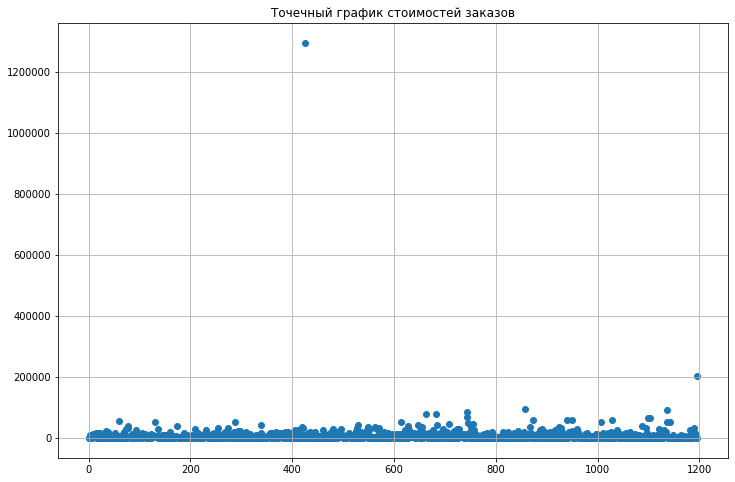

In [26]:
plt.figure(figsize=(12,8))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.grid();

Сразу на графике выделяются два явных выброса.

# 9. Считаем 95-й и 99-й перцентили стоимости заказов<a class="anchor" id="step2_9"></a>

In [27]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Тут поутипим примерно так же : все что выше 99 перцентиля, то есть больше или равно 58233, будем считать аномалией.

# 10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным<a class="anchor" id="step2_10"></a>

In [28]:
# созаддим переменные, в которых будет кол-во заказов пользователей, совершивших хотя бы 1 заказ
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorid', as_index=False).agg({'transactionid': pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorid', as_index=False).agg({'transactionid': pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

In [29]:
# создадим выборки sampleA и sampleB в которых каждый элемент — число заказов определённого пользователя, в том числе ноль
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(mergedCumulativeData['visitorsA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(mergedCumulativeData['visitorsB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Воспользуемся критерием Манна-Уитни

Определим H0: Конверсия в группе A **=** конверсии в группе B

H1: Конверсия в группе A **!=** конверсии в группе B

alpha примем = 0.05

In [30]:
st.mannwhitneyu(sampleA, sampleB)[1]

0.007326396144115789

In [31]:
conversion = orders.groupby('group').agg({'transactionid':'count'}).rename(columns={'transactionid':'orders'})\
                                     .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()
conversion['conversion'] = conversion['orders'] / conversion['visitors']
conversion

,group,orders,visitors,conversion
0,A,557,18736,0.029729
1,B,640,18916,0.033834


p-value получилось меньше alpha, следовательно нулевую гипотезу мы **отвергаем**, и следовательно, предположительно по сырым данным, конверсия в группе А не равна конверсии в группе В, и как выдно из таблицы, конкретно конверсия группы В больше конверсии группы А.

# 11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным<a class="anchor" id="step2_11"></a>

Так же воспользуемся критерием Манна-Уитни

определим  H0: Средний чек A **равен** среднему чеку группы B

H1: Средний чек A **не равен** среднему чеку группы B

alpha = 0.05

In [32]:
st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

0.3646454927716229

В данном случае p-value оказалось меньше alpha, значит нельзя отвергнуть нулевую гипотезу и средний чек группы А равен среднему чеку группы В.

# 12. Посчитаем статистическую значимость различий в конверсии между группами по «очишенным» данным<a class="anchor" id="step2_12"></a>

In [33]:
# найдем id тех, кто совершил 4 и болье заказов
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] >= 4]['userId'],\
                                 ordersByUsersB[ordersByUsersB['orders'] >= 4]['userId']],axis=0)

In [34]:
# а так же id тех, кто сорвершил покупки на аномлаьные суммы
usersWithExpensiveOrders = orders[orders['revenue'] >= 58233]['visitorid']

In [35]:
# объединим их
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()

In [36]:
# отфильтруем выборки
sampleAFiltered = pd.concat([ordersByUsersA[~(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],\
                             pd.Series(0,index=np.arange(mergedCumulativeData['visitorsA'].sum()\
                                                         - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[~(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],\
                             pd.Series(0,index=np.arange(mergedCumulativeData['visitorsB'].sum()\
                                                         - len(ordersByUsersB['orders'])),name='orders')],axis=0)

Воспользуемся критерием Манна-Уитни к отфильтрованным выборкам

Определим H0: Конверсия в группе A **=** конверсии в группе B

H1: Конверсия в группе A **!=** конверсии в группе B

alpha примем = 0.05

In [37]:
st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]

0.006050195548191645

In [38]:
sampleBFiltered.mean()/sampleAFiltered.mean()-1

0.15678803687674447

Ситуация не изменилась: мы так же отвергаем нулевую гипотезу - конверсии двух групп не равны(конверсия В больше конверсии группы А). Отностиельный выигрыш группы В равен 15.7%

# 13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным<a class="anchor" id="step2_13"></a>

Так же воспользуемся критерием Манна-Уитни

определим  H0: Средний чек A **равен** среднему чеку группы B

H1: Средний чек A **не равен** среднему чеку группы B

alpha = 0.05

In [39]:
st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',~(orders['visitorid'].isin(abnormalUsers)))]['revenue'],\
                orders[np.logical_and(orders['group'] == 'B',~(orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1]

0.47942353987323266

Ситуация такая же: мы не можем отвергнуть нулевую гипотезу, стастистически значимых различий в среднем чеке нет.

# 14. Принятие решения<a class="anchor" id="step2_14"></a>

Я считаю, что тест можно остановить и зафиксировать победу группы В. Хоть и средний чек в обоих группах не имеет статистически значмых различий, при этом конверсия группы В что в "сырых", что в "очищенных" данных значительнои и статистичиески значимо превышает конверсию в группе А, что в общем то хорошо для бизнеса.